Silhouette Score: 0.5531025123860587


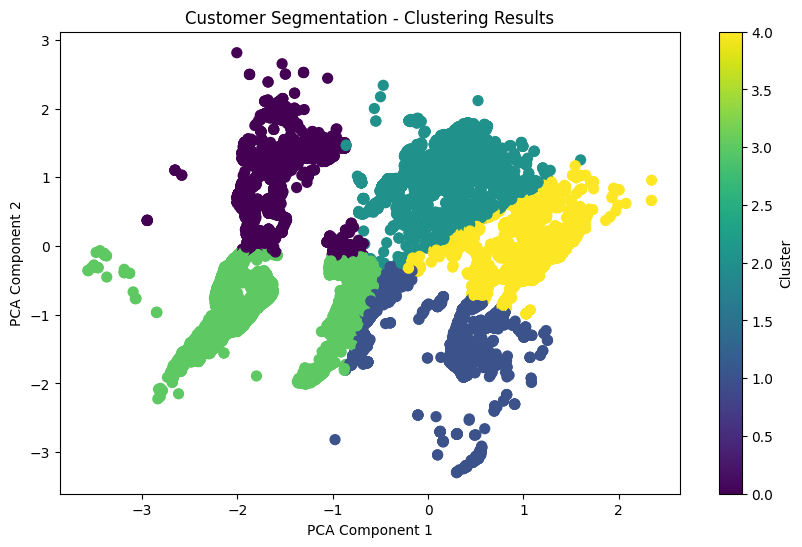

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/Customer Segmentation.csv'
data = pd.read_csv(file_path)

# Step 1: Drop irrelevant columns
irrelevant_columns = [
    'first_name', 'last_name', 'email', 'phone', 'street_address',
    'street_name', 'street_number', 'street_suffix', 'ip_address'
]
data = data.drop(columns=irrelevant_columns)

# Step 2: Handle missing values
data = data.dropna(subset=['country_code'])  # Drop rows with missing country codes

# Step 3: Encode categorical variables
categorical_features = ['gender', 'country', 'language', 'department']
numerical_features = ['latitude', 'longitude']

# One-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Step 4: Preprocess data
data_preprocessed = preprocessor.fit_transform(data)

# Step 5: Dimensionality reduction using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_preprocessed)

# Step 6: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Step 7: Evaluate clustering
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Step 8: Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segmentation - Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/sample_data/Customer Segmentation.csv"
df = pd.read_csv(file_path)

# Selecting relevant features (latitude, longitude, department)
features = ["latitude", "longitude", "department"]
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)





In [5]:
# Reducing dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

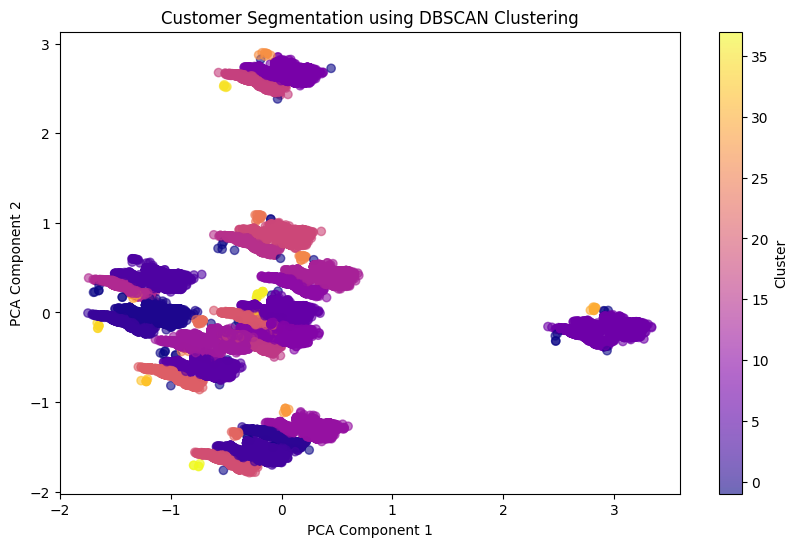

In [6]:
# Plotting the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma', alpha=0.6)
plt.title("Customer Segmentation using DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [7]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

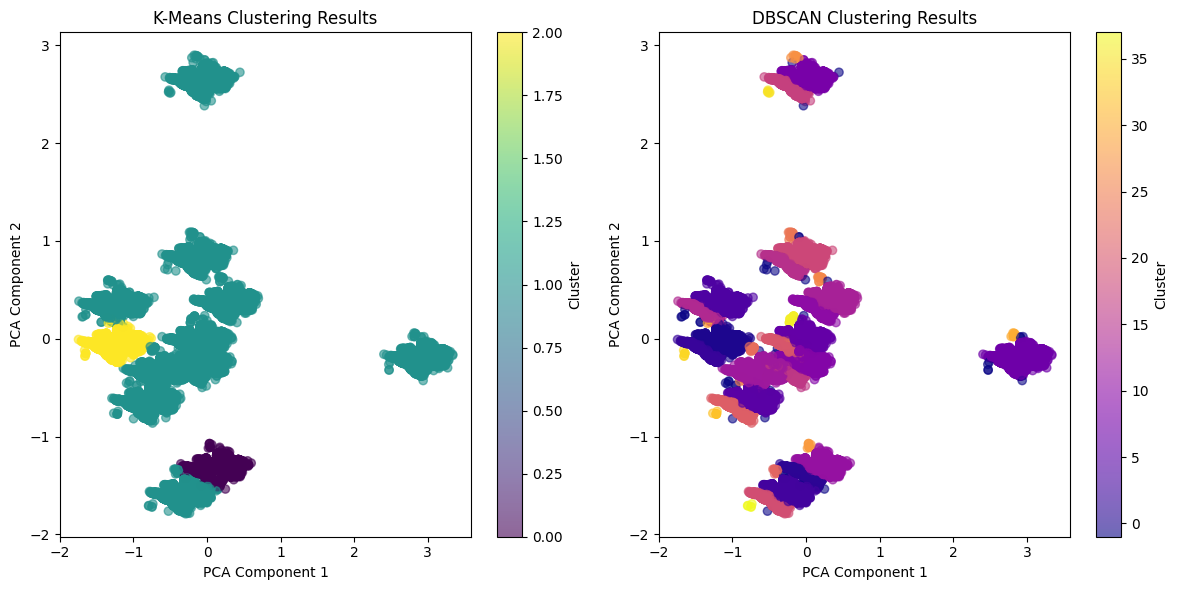

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/sample_data/Customer Segmentation.csv"
df = pd.read_csv(file_path)

# Selecting relevant features (latitude, longitude, department)
features = ["latitude", "longitude", "department"]
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Reducing dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting K-Means Clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")

# Plotting DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma', alpha=0.6)
plt.title("DBSCAN Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate K-Means Clustering
print("K-Means Clustering Evaluation:")
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, df['KMeans_Cluster'])
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, df['KMeans_Cluster'])

print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmeans:.4f}")

# Filter DBSCAN results to exclude noise (-1 cluster)
dbscan_mask = df['DBSCAN_Cluster'] != -1  # Mask to exclude noise points
if dbscan_mask.sum() > 1:  # Ensure there are enough points for evaluation
    X_scaled_dbscan = X_scaled[dbscan_mask]
    labels_dbscan_filtered = df['DBSCAN_Cluster'][dbscan_mask]

    print("\nDBSCAN Clustering Evaluation (Excluding Noise):")
    silhouette_dbscan = silhouette_score(X_scaled_dbscan, labels_dbscan_filtered)
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled_dbscan, labels_dbscan_filtered)
    calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled_dbscan, labels_dbscan_filtered)

    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("\nDBSCAN resulted in less than 2 clusters (excluding noise), metrics cannot be computed.")


K-Means Clustering Evaluation:
Silhouette Score: 0.1854
Davies-Bouldin Index: 1.2731
Calinski-Harabasz Index: 5088.7530

DBSCAN Clustering Evaluation (Excluding Noise):
Silhouette Score: 0.3827
Davies-Bouldin Index: 0.7230
Calinski-Harabasz Index: 11763.5696
